<a href="https://colab.research.google.com/github/naomifridman/Introduction_to_deep_learning/blob/master/Deep_Learning_keras_part4_train_callbacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Deep Learning 
# Part 4 - Keras Train callbacks
### Example Fushion Mnist data

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np

import matplotlib.gridspec as gridspec
from sklearn.metrics import accuracy_score, log_loss
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline  

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def print_stats(ytest, ypred):
    
    print("Accuracy: {:.5f}".format(accuracy_score(ytest, ypred)))
    print("Confusion Matrix:")
    print(confusion_matrix(ytest, ypred))
    print("Classification Report:")
    print(classification_report(ytest, ypred))

In [0]:
def show_list_images(imgs, titles=None):
    n_img = len(imgs)
    fig, m_axs = plt.subplots(1, n_img, figsize = (n_img*2, 4))
    i = 0
    for (c_im) in m_axs.T:
        c_im.imshow(imgs[i])
        c_im.axis('off')
        if (titles is not None):
            c_im.set_title(titles[i])
        i+=1

In [0]:
def drow_history(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+ metric])
    plt.title('model '+metric)
    plt.ylabel(metric)
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()    

## Keras summary
### Sequential Model
https://keras.io/models/sequential/

### Dense layer
https://keras.io/layers/core/

### Dropout layer
https://keras.io/layers/core/

### Optimizer RMSprop, Adam, SGD
https://keras.io/optimizers/

In [5]:
import keras
# Keras has many build in data sets
from keras.datasets import mnist
# Sequential is the basic feed forward neural network (FFN)
from keras.models import Sequential
# Dense is fully connected layer
# Dropout is a "noising" layer, to prevent over feet.
from keras.layers import Dense, Dropout
# Read about optimizers in keras documentation
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [0]:
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score

## Classification Exercise Fashion Mnist
https://keras.io/datasets/
Dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST. The class labels are:
```
* Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot
```

Build the best model for this data

## Load and Preprocess Data

In [7]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [8]:
x_train[0].shape, x_train.shape,x_test.shape

((28, 28), (60000, 28, 28), (10000, 28, 28))

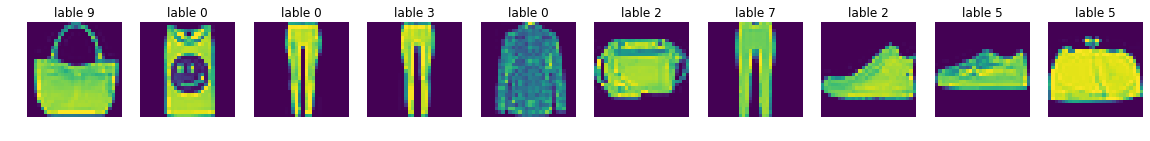

In [9]:
imgs = [x_train[i].reshape(28,28) for i in range(100,110)]
titles = [("lable {}").format(y_train[i]) for i in range(20)]
show_list_images(imgs, titles)

In [10]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [11]:
num_classes=10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_train[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## Build Keras Basic Model

In [15]:
def get_model():
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

model=get_model()
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model.fit(x_train, y_train,
                    batch_size=40,
                    epochs=4,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 8s 139us/step - loss: 0.5052 - acc: 0.8185 - val_loss: 0.4407 - val_acc: 0.8438
Epoch 2/4
60000/60000 [==============================] - 8s 135us/step - loss: 0.3997 - acc: 0.8598 - val_loss: 0.3968 - val_acc: 0.8598
Epoch 3/4
60000/60000 [==============================] - 8s 136us/step - loss: 0.3757 - acc: 0.8701 - val_loss: 0.4713 - val_acc: 0.8434
Epoch 4/4
60000/60000 [==============================] - 8s 136us/step - loss: 0.3617 - acc: 0.8768 - val_loss: 0.4344 - val_acc: 0.8592


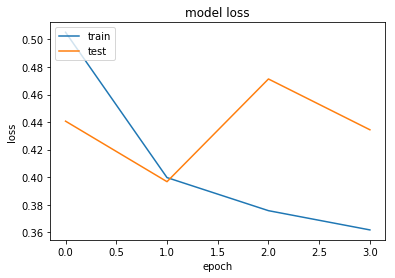

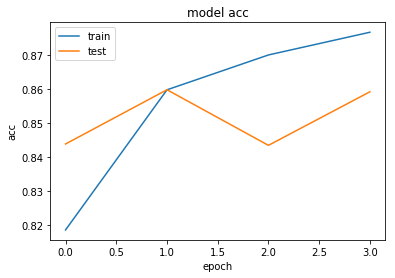

In [17]:
drow_history(history, 'loss')
drow_history(history, 'acc')

## Evaluate

In [18]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4344308448433876
Test accuracy: 0.8592


## Predict

In [19]:
pred_test = model.predict(x_test)
pred_test[0:5]

array([[7.7835853e-09, 4.5823411e-11, 2.1200233e-08, 2.8843166e-09,
        4.8735571e-09, 1.4115536e-02, 1.3823315e-07, 1.2286642e-02,
        3.1321056e-07, 9.7359735e-01],
       [1.2767391e-07, 4.9584055e-17, 9.9994624e-01, 1.6741096e-11,
        2.2617141e-05, 3.4308292e-17, 3.1038602e-05, 1.2770224e-19,
        4.5323784e-12, 3.0635242e-18],
       [7.7411751e-32, 1.0000000e+00, 1.9398484e-36, 8.4954985e-25,
        1.6125508e-38, 0.0000000e+00, 3.6318639e-36, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [3.6633983e-34, 1.0000000e+00, 0.0000000e+00, 2.7174607e-24,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.5374037e-01, 7.5791190e-06, 2.3574477e-01, 5.4945266e-03,
        1.0437249e-02, 9.4554234e-06, 4.9092591e-01, 1.3413891e-06,
        3.6380105e-03, 6.5928805e-07]], dtype=float32)

In [20]:
y_pred_test=np.argmax(pred_test, axis=1)
y_pred_test[0:10], y_test[0:10]

(array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32))

In [21]:
pred_test = model.predict_classes(x_test)
pred_test[0:5]

array([9, 2, 1, 1, 6])

In [22]:
print_stats(np.argmax(y_test, axis=1),y_pred_test )

Accuracy: 0.85920
Confusion Matrix:
[[752   0  40  66   5   1 126   0  10   0]
 [  0 959  10  25   3   0   2   0   1   0]
 [  5   0 899  11  65   0  19   0   1   0]
 [ 16   8  24 895  38   0  13   0   6   0]
 [  0   0 215  29 735   0  21   0   0   0]
 [  0   0   0   2   0 967   0  11   2  18]
 [106   0 210  48  82   0 544   0  10   0]
 [  0   0   0   0   0  32   0 902   0  66]
 [  1   0  12   5   4   2   2   3 971   0]
 [  0   1   0   0   0   7   1  23   0 968]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.75      0.80      1000
           1       0.99      0.96      0.97      1000
           2       0.64      0.90      0.75      1000
           3       0.83      0.90      0.86      1000
           4       0.79      0.73      0.76      1000
           5       0.96      0.97      0.96      1000
           6       0.75      0.54      0.63      1000
           7       0.96      0.90      0.93      1000
           8       0.97

# Keras callbacks
* https://keras.io/callbacks/

In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


earlystopper = EarlyStopping(patience=9, monitor='val_acc', verbose=1)

filepath=".\\model_acc_epoch_{epoch:03d}-acc_{acc:.3f}_loss_{loss:.3f}.hdf5"
checkpoint1 = ModelCheckpoint(filepath, monitor='acc', verbose=1, 
                              save_best_only=True, mode='max',
                             save_weights_only=True)

filepath=".\\model_val_acc_epoch_{epoch:03d}_val_acc_{val_acc:.4f}_val_loss_{val_loss:.4f}.hdf5"
checkpoint2 = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, 
                              save_best_only=True, mode='max',
                             save_weights_only=True)

filepath=".\\model_loss_epoch_{epoch:03d}_acc{acc:.3f}_loss{loss:.3f}.hdf5"
checkpoint3 = ModelCheckpoint(filepath, monitor='loss', verbose=1, 
                              save_best_only=True, mode='min',
                             save_weights_only=True)

filepath=".\\model_val_loss_epoch_{epoch:03d}_val_acc{val_acc:.4f}_val_loss{val_loss:.4f}.hdf5"
checkpoint4 = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, 
                              save_best_only=True, mode='min',
                             save_weights_only=True)

filepath=".\\model_last.hdf5"
checkpoint5 = ModelCheckpoint(filepath, monitor='val_loss', 
                              verbose=0, save_best_only=False,
                             save_weights_only=True)


reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=3, min_lr=0.000001, verbose=1,  cooldown=1)

In [0]:
model=get_model()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [25]:
history = model.fit(x_train, y_train,
                    batch_size=40,
                    epochs=100,
                    verbose=1,
                    validation_data=(x_test, y_test),
                   callbacks=[earlystopper, checkpoint1, checkpoint2, checkpoint3,
                             checkpoint4, checkpoint5, reduce_lr])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 9s 146us/step - loss: 0.5015 - acc: 0.8195 - val_loss: 0.4262 - val_acc: 0.8503

Epoch 00001: acc improved from -inf to 0.81953, saving model to .\model_acc_epoch_001-acc_0.820_loss_0.502.hdf5

Epoch 00001: val_acc improved from -inf to 0.85030, saving model to .\model_val_acc_epoch_001_val_acc_0.8503_val_loss_0.4262.hdf5

Epoch 00001: loss improved from inf to 0.50151, saving model to .\model_loss_epoch_001_acc0.820_loss0.502.hdf5

Epoch 00001: val_loss improved from inf to 0.42620, saving model to .\model_val_loss_epoch_001_val_acc0.8503_val_loss0.4262.hdf5
Epoch 2/100
60000/60000 [==============================] - 8s 136us/step - loss: 0.4017 - acc: 0.8603 - val_loss: 0.4169 - val_acc: 0.8666

Epoch 00002: acc improved from 0.81953 to 0.86033, saving model to .\model_acc_epoch_002-acc_0.860_loss_0.402.hdf5

Epoch 00002: val_acc improved from 0.85030 to 0.86660, saving model t

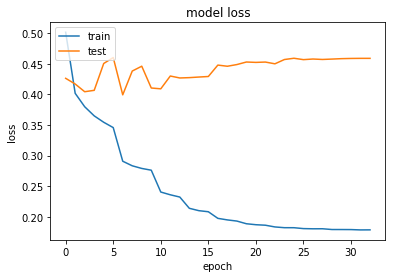

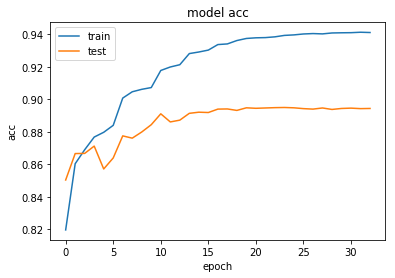

In [26]:
drow_history(history, 'loss')
drow_history(history, 'acc')

In [27]:
y_pred_test=model.predict_classes(x_test)
print_stats(np.argmax(y_test, axis=1),y_pred_test )

Accuracy: 0.89440
Confusion Matrix:
[[846   1  12  22   3   1 110   0   5   0]
 [  3 974   1  18   1   0   2   0   1   0]
 [ 17   0 807  14  97   0  63   1   1   0]
 [ 21   3  12 909  32   0  19   0   4   0]
 [  0   1  79  26 838   0  55   0   1   0]
 [  0   0   0   1   0 966   0  18   2  13]
 [108   0  86  30  60   1 707   0   8   0]
 [  0   0   0   0   0  11   0 970   0  19]
 [  4   0   4   4   5   4   4   4 970   1]
 [  0   0   0   0   0   8   1  34   0 957]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.81      0.81      0.81      1000
           3       0.89      0.91      0.90      1000
           4       0.81      0.84      0.82      1000
           5       0.97      0.97      0.97      1000
           6       0.74      0.71      0.72      1000
           7       0.94      0.97      0.96      1000
           8       0.98

In [0]:
model=get_model()
model.load_weights('.\model_val_acc_epoch_024_val_acc_0.8950_val_loss_0.4569.hdf5')
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [29]:
y_pred_test=model.predict_classes(x_test)
print_stats(np.argmax(y_test, axis=1),y_pred_test )

Accuracy: 0.89500
Confusion Matrix:
[[841   1  14  20   3   1 115   0   5   0]
 [  2 977   2  15   1   0   2   0   1   0]
 [ 18   0 817  13  90   0  60   1   1   0]
 [ 20   4  14 908  31   0  19   0   4   0]
 [  0   1  83  27 836   0  52   0   1   0]
 [  0   0   0   1   0 967   0  18   2  12]
 [105   0  88  30  61   1 707   0   8   0]
 [  0   0   0   0   0  11   0 969   0  20]
 [  4   0   4   4   5   4   4   4 970   1]
 [  0   0   0   0   0   8   1  33   0 958]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.80      0.82      0.81      1000
           3       0.89      0.91      0.90      1000
           4       0.81      0.84      0.82      1000
           5       0.97      0.97      0.97      1000
           6       0.74      0.71      0.72      1000
           7       0.95      0.97      0.96      1000
           8       0.98

### Learn more:
* https://keras.io/
* https://www.coursera.org/learn/neural-networks/lecture/kOQiH/why-object-recognition-is-difficult-5-min